In [1]:
# First let's import the packages we will use in this project
# You can do this all now or as you need them
import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

df = pd.read_csv('/Users/priya/Downloads/movies.csv')

In [2]:
# Let's explore the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [3]:
# Data Cleaning
# Let's see if there is any missing data

for col in df.columns:
    # Check for non-finite values (NaN or inf) and replace them with 0
    col_data = df[col].replace([np.inf, -np.inf, np.nan], 0)
    
    # Calculate the percentage of missing values
    pct_missing = np.mean(col_data.isnull())
    
    print("{} - {:.2f}%".format(col, pct_missing * 100))

name - 0.00%
rating - 0.00%
genre - 0.00%
year - 0.00%
released - 0.00%
score - 0.00%
votes - 0.00%
director - 0.00%
writer - 0.00%
star - 0.00%
country - 0.00%
budget - 0.00%
gross - 0.00%
company - 0.00%
runtime - 0.00%


In [4]:
# Data Types

df.dtypes

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object

In [5]:
# Change data type pf columns


# Assuming 'budget' is the column you want to convert to int64
df['budget'] = pd.to_numeric(df['budget'], errors='coerce', downcast='integer')
df['gross'] = pd.to_numeric(df['gross'], errors='coerce', downcast='integer')
df['votes'] = pd.to_numeric(df['votes'], errors='coerce', downcast='integer')


In [6]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [7]:
df.columns

Index(['name', 'rating', 'genre', 'year', 'released', 'score', 'votes',
       'director', 'writer', 'star', 'country', 'budget', 'gross', 'company',
       'runtime'],
      dtype='object')

In [27]:
# Create a sample DataFrame

# Extract the date and country into two separate columns

df[['date', 'country']] = df['released'].str.extract(r'([A-Za-z]+\s\d{1,2},\s\d{4})\s\((.*?)\)')

#Extract last four digit of the date as "yearcorrect"

df['yearcorrect'] = df['date'].str[-4:]

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",1980


In [29]:
df.sort_values(by=['gross'],inplace=False, ascending=False).head(10)



,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,yearcorrect
5445,Avatar,PG-13,Action,2009,"December 18, 2009 (United States)",7.8,1100000.0,James Cameron,James Cameron,Sam Worthington,United States,237000000.0,2.847246e+09,Twentieth Century Fox,162.0,"December 18, 2009",2009
7445,Avengers: Endgame,PG-13,Action,2019,"April 26, 2019 (United States)",8.4,903000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,356000000.0,2.797501e+09,Marvel Studios,181.0,"April 26, 2019",2019
3045,Titanic,PG-13,Drama,1997,"December 19, 1997 (United States)",7.8,1100000.0,James Cameron,James Cameron,Leonardo DiCaprio,United States,200000000.0,2.201647e+09,Twentieth Century Fox,194.0,"December 19, 1997",1997
6663,Star Wars: Episode VII - The Force Awakens,PG-13,Action,2015,"December 18, 2015 (United States)",7.8,876000.0,J.J. Abrams,Lawrence Kasdan,Daisy Ridley,United States,245000000.0,2.069522e+09,Lucasfilm,138.0,"December 18, 2015",2015
7244,Avengers: Infinity War,PG-13,Action,2018,"April 27, 2018 (United States)",8.4,897000.0,Anthony Russo,Christopher Markus,Robert Downey Jr.,United States,321000000.0,2.048360e+09,Marvel Studios,149.0,"April 27, 2018",2018
7480,The Lion King,PG,Animation,2019,"July 19, 2019 (United States)",6.9,222000.0,Jon Favreau,Jeff Nathanson,Donald Glover,United States,260000000.0,1.670728e+09,Walt Disney Pictures,118.0,"July 19, 2019",2019
6653,Jurassic World,PG-13,Action,2015,"June 12, 2015 (United States)",7.0,593000.0,Colin Trevorrow,Rick Jaffa,Chris Pratt,United States,150000000.0,1.670516e+09,Universal Pictures,124.0,"June 12, 2015",2015
6043,The Avengers,PG-13,Action,2012,"May 4, 2012 (United States)",8.0,1300000.0,Joss Whedon,Joss Whedon,Robert Downey Jr.,United States,220000000.0,1.518816e+09,Marvel Studios,143.0,"May 4, 2012",2012
6646,Furious 7,PG-13,Action,2015,"April 3, 2015 (United States)",7.1,370000.0,James Wan,Chris Morgan,Vin Diesel,United States,190000000.0,1.515341e+09,Universal Pictures,137.0,"April 3, 2015",2015
7494,Frozen II,PG,Animation,2019,"November 22, 2019 (United States)",6.8,148000.0,Chris Buck,Jennifer Lee,Kristen Bell,United States,150000000.0,1.450027e+09,Walt Disney Animation Studios,103.0,"November 22, 2019",2019


In [11]:
pd.set_option('display.max_rows', None)

In [12]:
# Drop any duplicates

df_company= df['company'].drop_duplicates().sort_values(ascending= False)

df_company.head(10)

7129                        thefyzz
5664                    micro_scope
6412       iDeal Partners Film Fund
4007                       i5 Films
6793                     i am OTHER
6420                           erbp
3776                 double A Films
524       Zupnik-Curtis Enterprises
3330    Zucker Brothers Productions
146                Zoetrope Studios
Name: company, dtype: object

In [13]:
# Budget high correlation
# Company high correlation



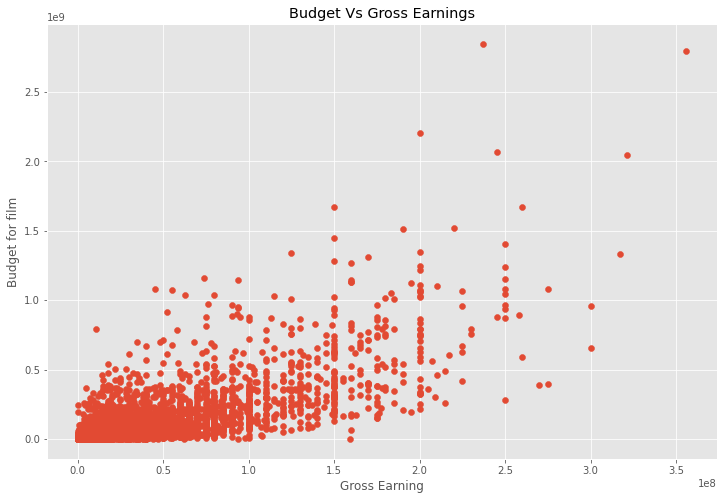

In [14]:
# Scatter plot with budget vs gross

plt.scatter(x=df['budget'], y=df['gross'])

plt.title('Budget Vs Gross Earnings')

plt.xlabel('Gross Earning')

plt.ylabel('Budget for film')

plt.show()

<AxesSubplot:xlabel='budget', ylabel='gross'>

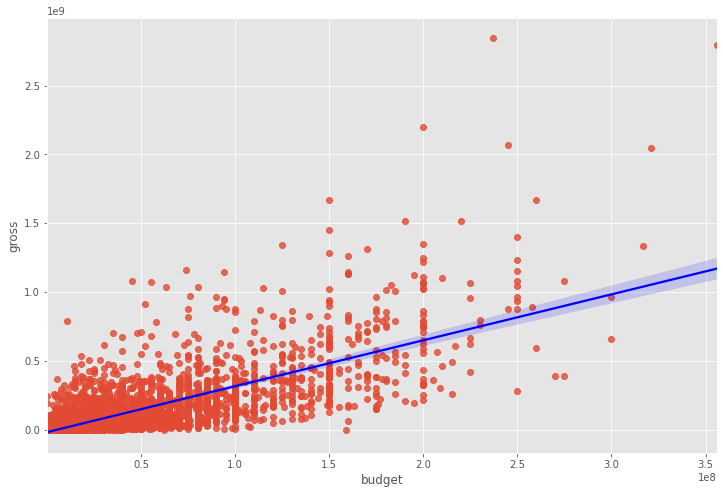

In [15]:
# plot the budget vs gross using seaborn

sns.regplot(x='budget', y='gross', data=df, line_kws={"color":"blue"})

In [16]:
df.corr(method='pearson') #pearson, kendall, spearman

,year,score,votes,budget,gross,runtime
year,1.000000,0.097995,0.222945,0.329321,0.257486,0.120811
score,0.097995,1.000000,0.409182,0.076254,0.186258,0.399451
votes,0.222945,0.409182,1.000000,0.442429,0.630757,0.309212
budget,0.329321,0.076254,0.442429,1.000000,0.740395,0.320447
gross,0.257486,0.186258,0.630757,0.740395,1.000000,0.245216
runtime,0.120811,0.399451,0.309212,0.320447,0.245216,1.000000


In [17]:
# High correlation between budget and gross

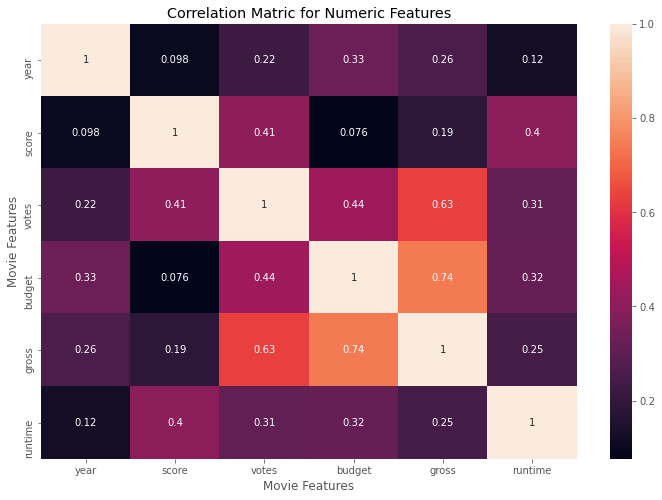

In [18]:
# Correlation Matric using Seaborn

correlation_matrix = df.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title ('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [19]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",1980


In [30]:
#Categorization of non-numeric data

df_numerized = df.copy()

for col_name in df_numerized.columns:
    if df_numerized[col_name].dtype == 'object':
        df_numerized[col_name] = df_numerized[col_name].astype('category')
        df_numerized[col_name] = df_numerized[col_name].cat.codes

df_numerized.head(10)


,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,yearcorrect
0,6587,6,6,1980,1705,8.4,927000.0,2589,4014,1047,56,19000000.0,46998772.0,2319,146.0,1487,0
1,5573,6,1,1980,1492,5.8,65000.0,2269,1632,327,56,4500000.0,58853106.0,731,104.0,1288,0
2,5142,4,0,1980,1771,8.7,1200000.0,1111,2567,1745,56,18000000.0,538375067.0,1540,124.0,1542,0
3,286,4,4,1980,1492,7.7,221000.0,1301,2000,2246,56,3500000.0,83453539.0,1812,88.0,1288,0
4,1027,6,4,1980,1543,7.3,108000.0,1054,521,410,56,6000000.0,39846344.0,1777,98.0,1337,0
5,2109,6,10,1980,2502,6.4,123000.0,2528,4362,241,56,550000.0,39754601.0,1812,95.0,2161,0
6,5574,6,0,1980,1771,7.9,188000.0,1412,838,1277,56,27000000.0,115229890.0,2281,133.0,1542,0
7,4436,6,3,1980,699,8.2,330000.0,1829,1769,2240,56,18000000.0,23402427.0,631,129.0,599,0
8,5281,4,0,1980,1753,6.8,101000.0,2306,1979,877,56,54000000.0,108185706.0,883,127.0,1529,1
9,6213,6,3,1980,2286,7.0,10000.0,2864,423,589,56,10000000.0,15795189.0,2272,100.0,1978,0


In [31]:
df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,yearcorrect
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United States,19000000.0,46998772.0,Warner Bros.,146.0,"June 13, 1980",1980
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0,"July 2, 1980",1980
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0,"June 20, 1980",1980
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0,"July 2, 1980",1980
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0,"July 25, 1980",1980


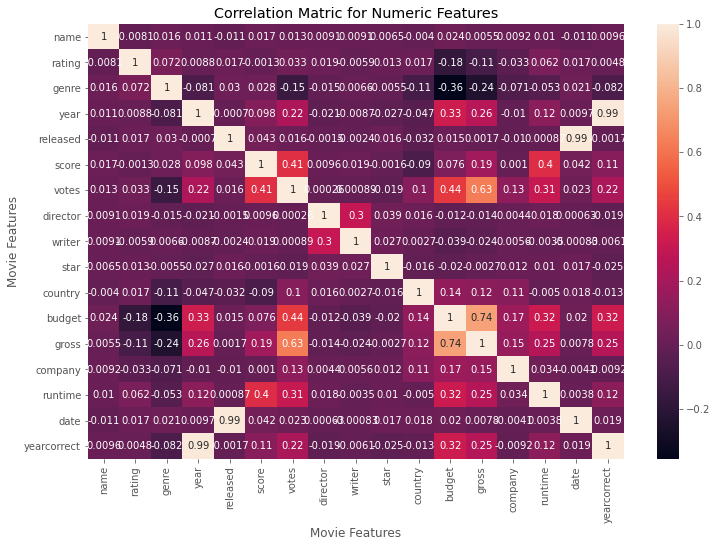

In [22]:
# Correlation matric using Seaborn for all categorized columns

correlation_matrix = df_numerized.corr(method='pearson')

sns.heatmap(correlation_matrix, annot=True)

plt.title ('Correlation Matric for Numeric Features')

plt.xlabel('Movie Features')

plt.ylabel('Movie Features')

plt.show()

In [23]:
df_numerized.corr()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime,date,yearcorrect
name,1.000000,-0.008069,0.016355,0.011453,-0.011311,0.017097,0.013088,0.009079,0.009081,0.006472,-0.004039,0.023970,0.005533,0.009211,0.010392,-0.011245,0.009553
rating,-0.008069,1.000000,0.072423,0.008779,0.016613,-0.001314,0.033225,0.019483,-0.005921,0.013405,0.016953,-0.176002,-0.107339,-0.032943,0.062145,0.017039,0.004829
genre,0.016355,0.072423,1.000000,-0.081261,0.029822,0.027965,-0.145307,-0.015258,0.006567,-0.005477,-0.106374,-0.356564,-0.235650,-0.071067,-0.052711,0.020958,-0.082070
year,0.011453,0.008779,-0.081261,1.000000,-0.000695,0.097995,0.222945,-0.020795,-0.008656,-0.027242,-0.046631,0.329321,0.257486,-0.010431,0.120811,0.009729,0.992136
released,-0.011311,0.016613,0.029822,-0.000695,1.000000,0.042788,0.016097,-0.001478,-0.002404,0.015777,-0.032078,0.014683,0.001659,-0.010474,0.000868,0.987641,-0.001653
score,0.017097,-0.001314,0.027965,0.097995,0.042788,1.000000,0.409182,0.009559,0.019416,-0.001609,-0.089669,0.076254,0.186258,0.001030,0.399451,0.041595,0.105341
votes,0.013088,0.033225,-0.145307,0.222945,0.016097,0.409182,1.000000,0.000260,0.000892,-0.019282,0.101995,0.442429,0.630757,0.133204,0.309212,0.022522,0.219954
director,0.009079,0.019483,-0.015258,-0.020795,-0.001478,0.009559,0.000260,1.000000,0.299067,0.039234,0.016186,-0.012272,-0.014441,0.004404,0.017624,0.000626,-0.018620
writer,0.009081,-0.005921,0.006567,-0.008656,-0.002404,0.019416,0.000892,0.299067,1.000000,0.027245,0.002692,-0.039451,-0.023519,0.005646,-0.003511,-0.000827,-0.006134
star,0.006472,0.013405,-0.005477,-0.027242,0.015777,-0.001609,-0.019282,0.039234,0.027245,1.000000,-0.015670,-0.019589,-0.002717,0.012442,0.010174,0.016562,-0.025288


In [32]:
# Unstaking correlation matrics 

correlation_matrix = df_numerized.corr()
corr_pairs = correlation_matrix.unstack()
corr_pairs.head(10)

name  name        1.000000
      rating     -0.008069
      genre       0.016355
      year        0.011453
      released   -0.011311
      score       0.017097
      votes       0.013088
      director    0.009079
      writer      0.009081
      star        0.006472
dtype: float64

In [36]:
# Sorting correlation 

sorted_pairs = corr_pairs.sort_values(ascending=False)

sorted_pairs.head(30)

yearcorrect  yearcorrect    1.000000
date         date           1.000000
rating       rating         1.000000
genre        genre          1.000000
year         year           1.000000
released     released       1.000000
score        score          1.000000
votes        votes          1.000000
director     director       1.000000
star         star           1.000000
country      country        1.000000
budget       budget         1.000000
gross        gross          1.000000
company      company        1.000000
runtime      runtime        1.000000
writer       writer         1.000000
name         name           1.000000
yearcorrect  year           0.992136
year         yearcorrect    0.992136
released     date           0.987641
date         released       0.987641
budget       gross          0.740395
gross        budget         0.740395
votes        gross          0.630757
gross        votes          0.630757
votes        budget         0.442429
budget       votes          0.442429
v

In [26]:
# Votes and budget have the highest correlation to gross earnings

# Company has low correlation

# 